# Employee Segmentation

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:

import os

script_dir = os.path.dirname(os.path.abspath("__file__"))

In [3]:
df = pd.read_csv(script_dir+'/Uncleaned_employees_final_dataset.csv')

In [4]:
df.shape

(17417, 13)

In [5]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,17417.0,39083.491129,22707.024087,3.0,19281.0,39122.0,58838.0,78295.0
no_of_trainings,17417.0,1.250732,0.595692,1.0,1.0,1.0,1.0,9.0
age,17417.0,34.807774,7.694046,20.0,29.0,33.0,39.0,60.0
previous_year_rating,16054.0,3.345459,1.265386,1.0,3.0,3.0,4.0,5.0
length_of_service,17417.0,5.801860,4.175533,1.0,3.0,5.0,7.0,34.0
KPIs_met_more_than_80,17417.0,0.358845,0.479675,0.0,0.0,0.0,1.0,1.0
awards_won,17417.0,0.023368,0.151074,0.0,0.0,0.0,0.0,1.0
avg_training_score,17417.0,63.176322,13.418179,39.0,51.0,60.0,75.0,99.0


# Data cleaning

In [8]:
df.isna().sum()

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [9]:
df[df['education'].isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
49,3720,Sales & Marketing,region_2,NaN,m,sourcing,1,36,5.0,4,1,0,49
67,26977,Operations,region_2,NaN,m,sourcing,1,28,3.0,3,0,0,59
89,2347,Analytics,region_15,NaN,m,other,2,37,5.0,8,1,0,82
127,42719,Analytics,region_21,NaN,m,sourcing,1,27,NaN,1,0,0,80
138,2721,Analytics,region_22,NaN,f,sourcing,2,26,5.0,3,1,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17334,72527,Analytics,region_32,NaN,m,sourcing,1,26,3.0,1,1,0,81
17348,47420,Sales & Marketing,region_2,NaN,m,sourcing,1,28,2.0,7,0,0,48
17354,49841,Analytics,region_22,NaN,m,sourcing,1,28,3.0,6,0,0,90
17373,42917,Sales & Marketing,region_14,NaN,m,other,1,24,NaN,1,0,0,50


In [10]:
df[df['previous_year_rating'].isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
21,5677,Technology,region_17,Bachelors,m,sourcing,1,25,NaN,1,0,0,80
32,67672,Technology,region_17,Bachelors,m,other,1,29,NaN,1,1,0,85
39,55325,Analytics,region_22,Bachelors,m,other,1,25,NaN,1,0,0,88
47,44159,Analytics,region_22,Masters & above,m,other,1,31,NaN,1,1,0,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17344,15200,Analytics,region_26,Bachelors,m,other,1,28,NaN,1,1,0,86
17358,2142,HR,region_22,Bachelors,m,referred,1,30,NaN,1,0,0,46
17373,42917,Sales & Marketing,region_14,NaN,m,other,1,24,NaN,1,0,0,50
17384,74428,Sales & Marketing,region_5,Bachelors,f,other,1,27,NaN,1,0,0,47


In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(15424, 13)

In [13]:
df.duplicated().sum()

2

In [14]:
duplicate = df[df.duplicated()]
 
duplicate

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
17414,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17415,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [15]:
df.drop_duplicates(inplace=True)

A total of 2 duplicates was dropped. 15422 records to work with.

In [16]:
df.drop(columns=['employee_id'], inplace=True)

In [17]:
df.department.value_counts()

department
Sales & Marketing    4601
Operations           3284
Procurement          2077
Technology           1984
Analytics            1436
HR                    738
Finance               716
R&D                   299
Legal                 287
Name: count, dtype: int64

In [18]:
df.region.value_counts()

region
region_2     3421
region_22    1659
region_7     1330
region_13     805
region_15     764
region_26     653
region_31     575
region_4      544
region_27     452
region_16     396
region_11     388
region_28     383
region_23     354
region_19     299
region_29     281
region_17     247
region_14     246
region_32     238
region_25     227
region_5      222
region_20     222
region_10     200
region_8      190
region_6      190
region_30     182
region_24     152
region_1      150
region_12     134
region_34     113
region_21     107
region_3      101
region_9       99
region_33      86
region_18      12
Name: count, dtype: int64

In [19]:
df.education.value_counts()

education
Bachelors          10464
Masters & above     4790
Below Secondary      168
Name: count, dtype: int64

In [20]:
df.gender.value_counts()

gender
m    10811
f     4611
Name: count, dtype: int64

In [21]:
df.recruitment_channel.value_counts()

recruitment_channel
other       8659
sourcing    6476
referred     287
Name: count, dtype: int64

In [22]:
num_col = df.select_dtypes(include=np.number)

# Exploratory Data Analysis


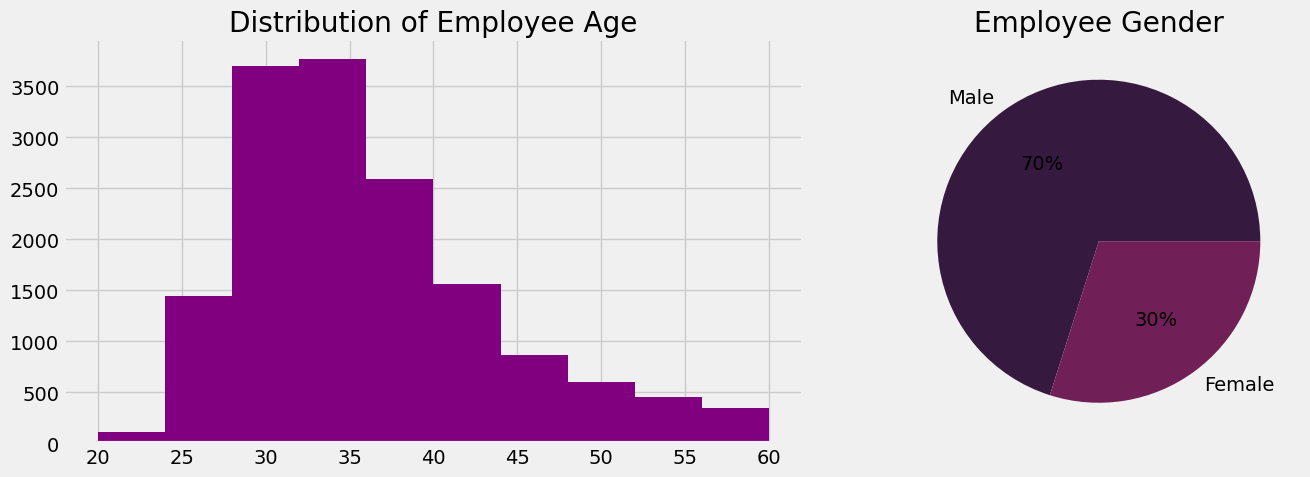

In [23]:
plt.style.use("fivethirtyeight")
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(15,5))
palette_color = sns.color_palette('rocket')
ax[0].hist(x=df['age'],color='purple')
ax[0].set_title("Distribution of Employee Age")
ax[1].pie(df['gender'].value_counts(),autopct='%1.f%%',colors=palette_color,labels=['Male','Female'])
ax[1].set_title("Employee Gender")
plt.tight_layout();

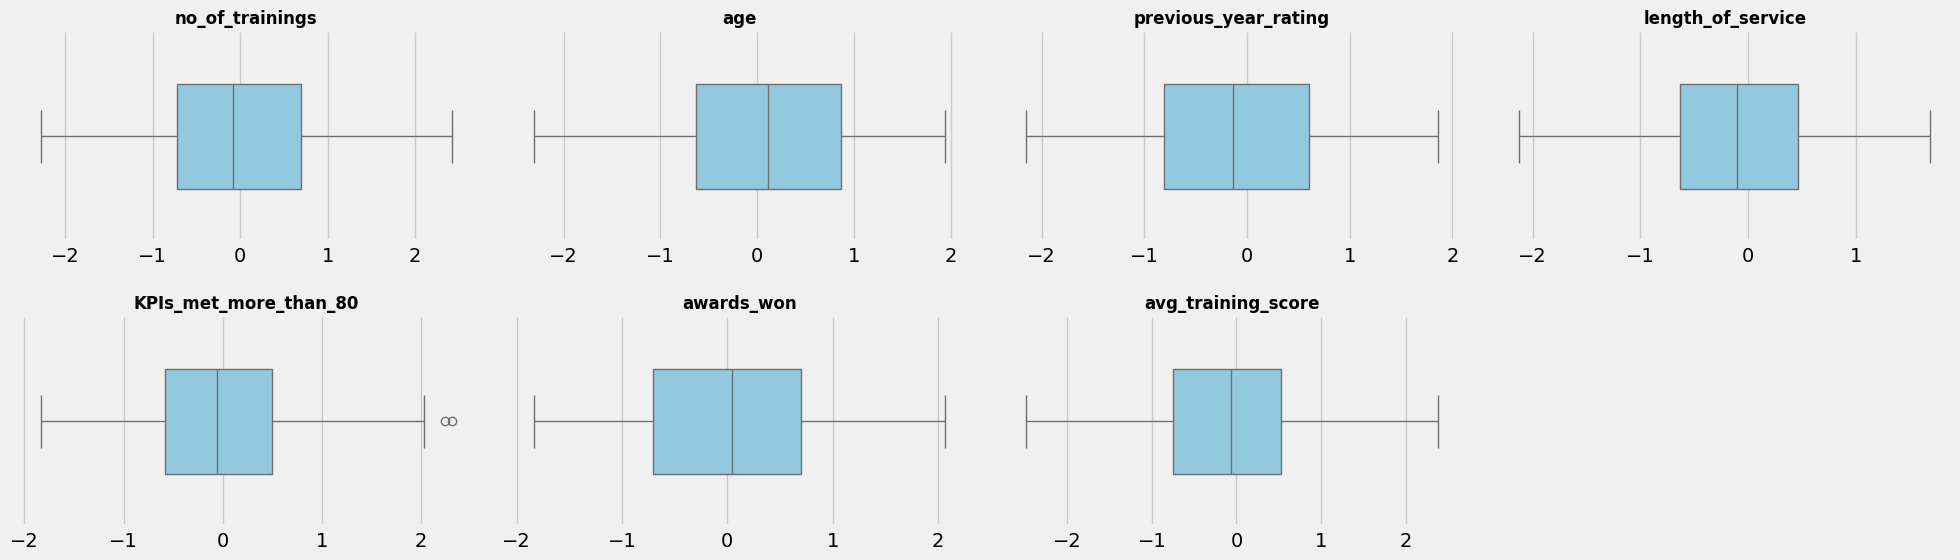

In [24]:
# Creating a sample DataFrame for demonstration
data = pd.DataFrame({col: np.random.randn(100) for col in num_col})

# Setting the style to 'fivethirtyeight'
plt.style.use("fivethirtyeight")

# Creating the boxplot
plt.figure(figsize=(20, 20))
for index, column in enumerate(num_col):
    plt.subplot(7, 4, index+1)
    sns.boxplot(data=data, x=column, color='skyblue', width=0.5)  # Customizing boxplot color and width
    plt.xlabel('')  # Removing x-axis label
    plt.ylabel('')  # Removing y-axis label
    plt.title(column, fontsize=12, fontweight='bold')  # Adding title with custom fontsize and fontweight
    sns.despine()  # Removing spines from the plot

plt.tight_layout(pad=1.5)  # Adjusting layout
plt.show()

Observations:
    there aren't any outliers. Some variables may seem like outliers but they are not.

C:\Users\chkal\AppData\Local\Temp\ipykernel_40568\3425195.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='awards_won', data=df, palette=custom_palette)  # Using the custom color palette


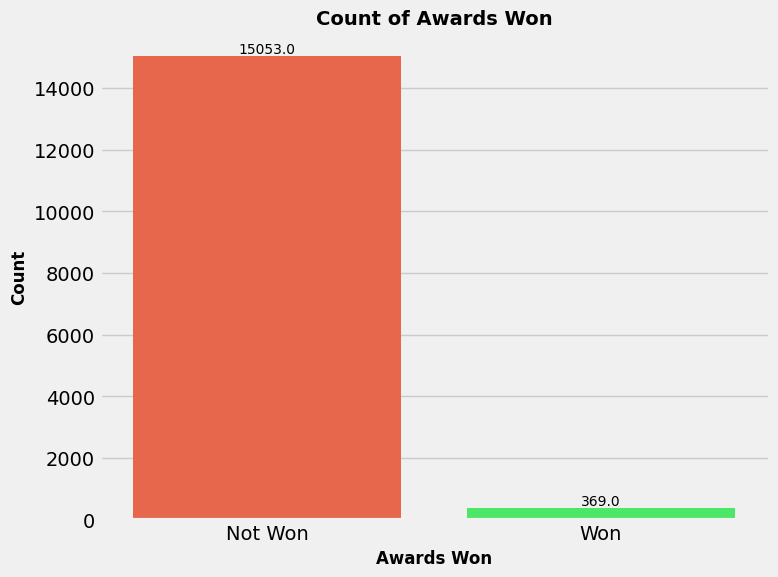

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Replace it with your actual data if needed

# Setting the color palette to a custom one for more attractiveness
custom_palette = ["#FF5733", "#33FF57"]  # Custom colors for the countplot bars

# Creating the countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='awards_won', data=df, palette=custom_palette)  # Using the custom color palette
plt.xlabel('Awards Won', fontsize=12, fontweight='bold')  # Adding x-axis label with custom fontsize and fontweight
plt.ylabel('Count', fontsize=12, fontweight='bold')  # Adding y-axis label with custom fontsize and fontweight
plt.title('Count of Awards Won', fontsize=14, fontweight='bold')  # Adding title with custom fontsize and fontweight

# Iterating over each subplot and adding text labels on top of each bar to show the count
for ax in plt.gcf().get_axes():
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.xticks(ticks=[0, 1], labels=['Not Won', 'Won'])  # Customizing x-axis ticks and labels
sns.despine()  # Removing spines from the plot
plt.tight_layout()  # Adjusting layout
plt.show()


C:\Users\chkal\AppData\Local\Temp\ipykernel_40568\2521358481.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='KPIs_met_more_than_80', data=df, palette=custom_palette)  # Using the custom color palette


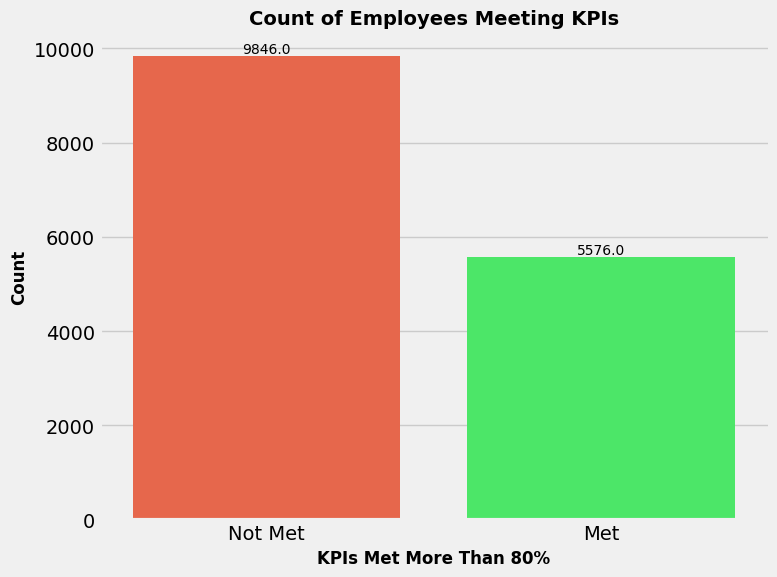

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Replace it with your actual data if needed

# Setting the color palette to a custom one for more attractiveness
custom_palette = ["#FF5733", "#33FF57"]  # Custom colors for the countplot bars

# Creating the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='KPIs_met_more_than_80', data=df, palette=custom_palette)  # Using the custom color palette
plt.xlabel('KPIs Met More Than 80%', fontsize=12, fontweight='bold')  # Adding x-axis label with custom fontsize and fontweight
plt.ylabel('Count', fontsize=12, fontweight='bold')  # Adding y-axis label with custom fontsize and fontweight
plt.title('Count of Employees Meeting KPIs', fontsize=14, fontweight='bold')  # Adding title with custom fontsize and fontweight

# Adding text labels on top of each bar to show the count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(ticks=[0, 1], labels=['Not Met', 'Met'])  # Customizing x-axis ticks and labels
sns.despine()  # Removing spines from the plot
plt.tight_layout()  # Adjusting layout
plt.show()


C:\Users\chkal\AppData\Local\Temp\ipykernel_40568\3605812916.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.countplot(y='region', data=df, palette='pastel',  # Changing the color palette to 'pastel'


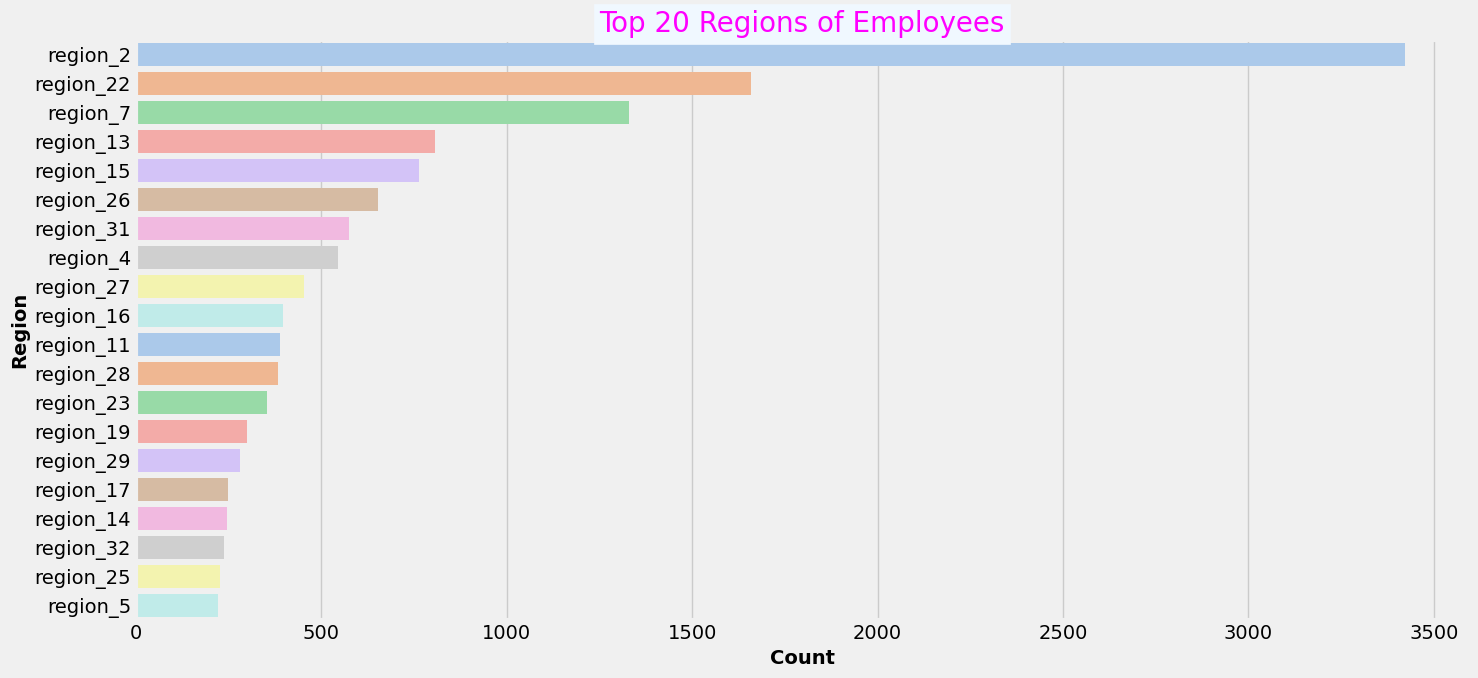

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Replace it with your actual data if needed

# Setting the style to 'fivethirtyeight'
plt.style.use("fivethirtyeight")

# Creating the countplot
plt.figure(figsize=(15, 7))
chart = sns.countplot(y='region', data=df, palette='pastel',  # Changing the color palette to 'pastel'
                      order=df['region'].value_counts()[:20].index)
plt.title("Top 20 Regions of Employees",
          fontsize=20,
          backgroundcolor='AliceBlue',
          color='magenta')
plt.xlabel("Count", fontsize=14, fontweight='bold')  # Adding x-axis label with custom fontsize and fontweight
plt.ylabel("Region", fontsize=14, fontweight='bold')  # Adding y-axis label with custom fontsize and fontweight
plt.tight_layout()  # Adjusting layout
plt.show()


C:\Users\chkal\AppData\Local\Temp\ipykernel_40568\3421351344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.countplot(x='department',data=df,palette='rocket', order = df['department'].value_counts().index)


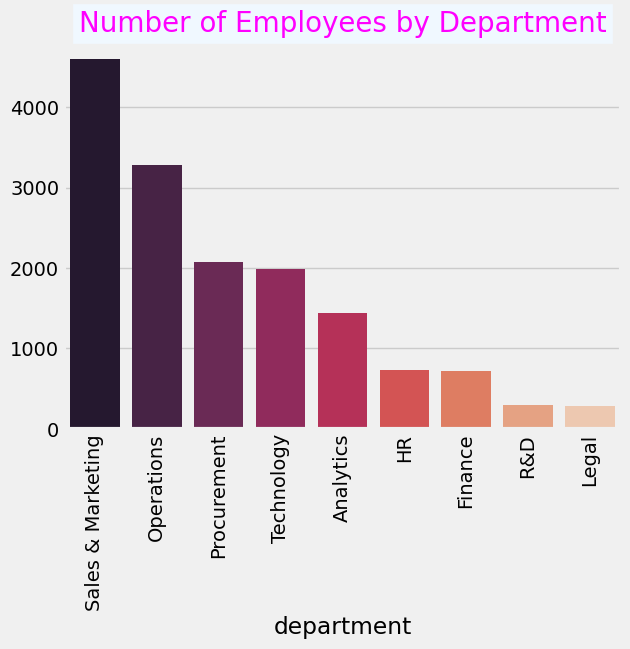

In [28]:
plt.style.use("fivethirtyeight")
chart=sns.countplot(x='department',data=df,palette='rocket', order = df['department'].value_counts().index)
plt.title("Number of Employees by Department",
          fontsize='20',
          backgroundcolor='AliceBlue',
          color='magenta')
plt.xticks(rotation=90)
plt.ylabel("")
plt.show();

C:\Users\chkal\AppData\Local\Temp\ipykernel_40568\2898486664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.countplot(x='education',data=df,palette='rocket', order = df['education'].value_counts().index)


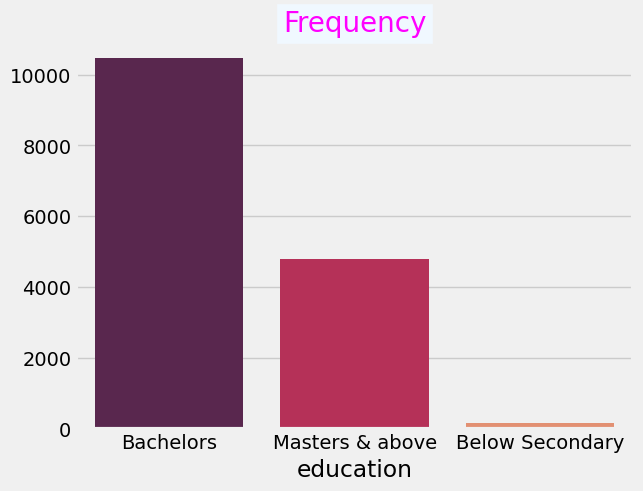

In [29]:
plt.style.use("fivethirtyeight")
chart=sns.countplot(x='education',data=df,palette='rocket', order = df['education'].value_counts().index)
plt.title("Frequency",
          fontsize='20',
          backgroundcolor='AliceBlue',
          color='magenta')
plt.ylabel("")
plt.show();

C:\Users\chkal\AppData\Local\Temp\ipykernel_40568\2099174841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.countplot(x='recruitment_channel',data=df,palette='rocket', order = df['recruitment_channel'].value_counts().index)


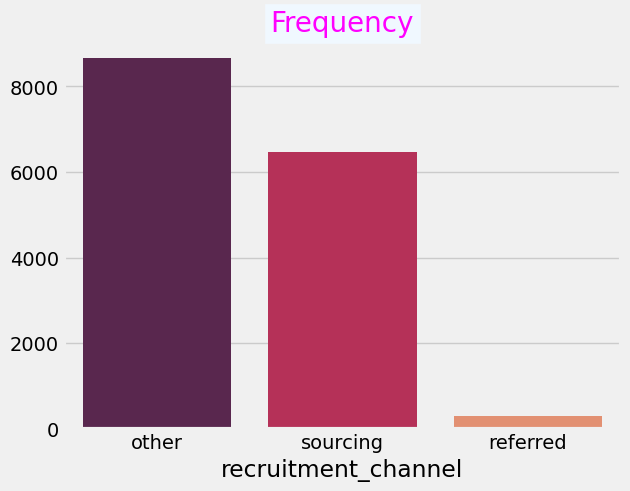

In [30]:
plt.style.use("fivethirtyeight")
chart=sns.countplot(x='recruitment_channel',data=df,palette='rocket', order = df['recruitment_channel'].value_counts().index)
plt.title("Frequency",
          fontsize='20',
          backgroundcolor='AliceBlue',
          color='magenta')
plt.ylabel("")
plt.show();

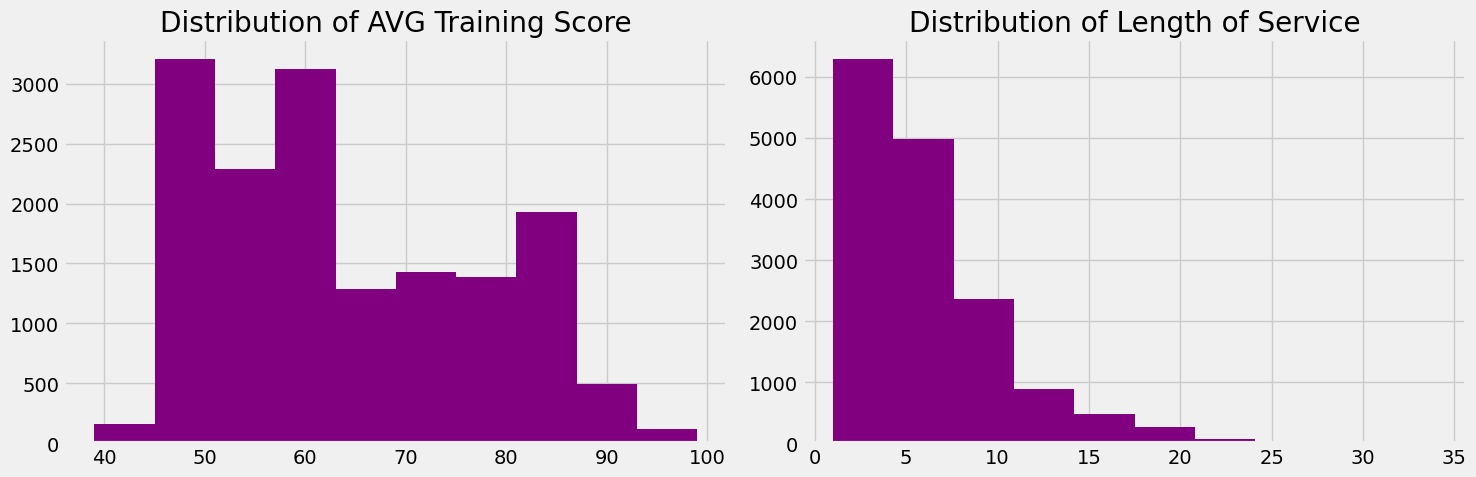

In [31]:
plt.style.use("fivethirtyeight")
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(15,5))
palette_color = sns.color_palette('rocket')
ax[0].hist(x=df['avg_training_score'],color='purple')
ax[0].set_title("Distribution of AVG Training Score")
ax[1].hist(x=df['length_of_service'], color='purple')
ax[1].set_title("Distribution of Length of Service")
plt.tight_layout();

In [32]:
df_copy = df.copy()

# Feature Engineering

In [33]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
1,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
5,Procurement,region_7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68


In [34]:
df = pd.get_dummies(df,columns=['department'])

In [35]:
df = pd.get_dummies(df,columns=['gender','education','recruitment_channel'])

In [36]:
df.drop(columns=['region'], inplace=True)

# Standardization

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
minmax = MinMaxScaler()

In [39]:
df[df.columns] = minmax.fit_transform(df)

In [40]:
df = df.reset_index(drop=True)
df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score,department_Analytics,department_Finance,department_HR,...,department_Sales & Marketing,department_Technology,gender_f,gender_m,education_Bachelors,education_Below Secondary,education_Masters & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0.00,0.275,0.50,0.121212,0.0,0.0,0.200000,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.00,0.275,0.00,0.090909,0.0,0.0,0.133333,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.25,0.275,0.25,0.242424,0.0,0.0,0.433333,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.00,0.250,0.75,0.181818,0.0,0.0,0.366667,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.00,0.400,0.50,0.030303,0.0,0.0,0.483333,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


# Modeling

## PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

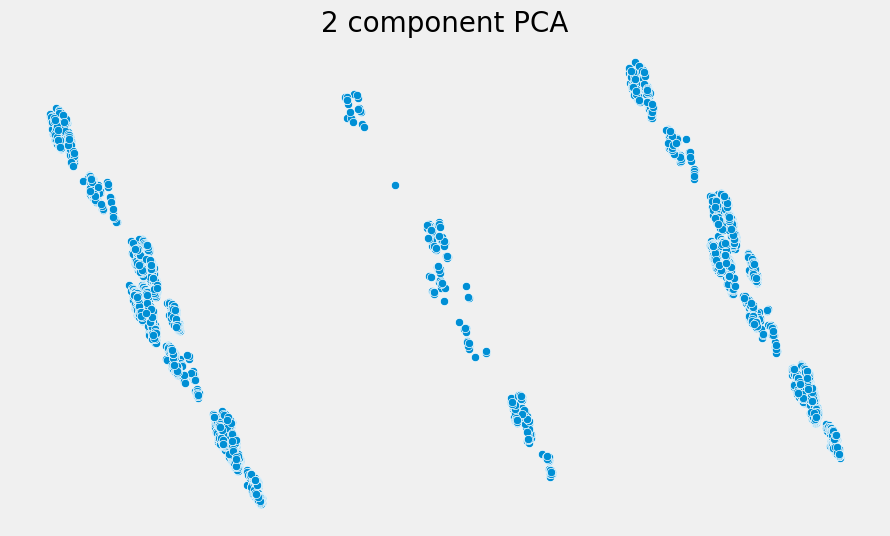

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', ax=ax)

ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.spines[:].set_visible(False)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize = 20)
plt.show()

## Elbow Method

In [44]:
inertias = []

for k in range(2, 13):
    model = KMeans(n_clusters=k,random_state=42, n_init='auto')
    model.fit(principalComponents)
    inertias.append(model.inertia_)

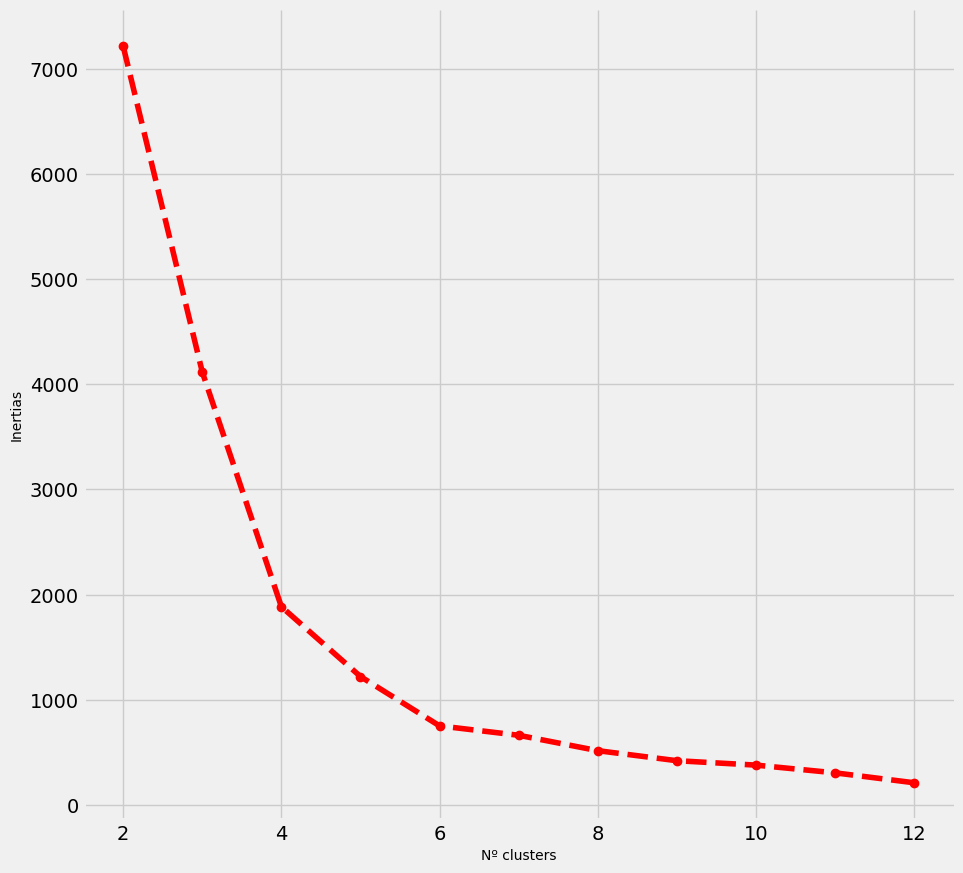

In [45]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(range(2, 13), inertias, 'r--', marker='o', label='Inertias')
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Nº clusters', fontsize=10)
ax.set_ylabel('Inertias', fontsize=10)

plt.show() 

Per Elbow Method, an ideal number of clusters 5 or 6. We will apply the silhouette score method.

## Silhouette Score Method

In [46]:
silhouette_scores = []

for k in range(2, 13):
    model = KMeans(n_clusters=k,random_state=42, n_init='auto')
    model.fit(principalComponents)
    silhouette_scores.append(silhouette_score(principalComponents, model.labels_))

In [47]:
silhouette_scores

[0.5369436651510872,
 0.570703042000305,
 0.6498648234867788,
 0.6781971545508458,
 0.7011302375038584,
 0.6486508457847547,
 0.6236940490972415,
 0.6306776598153633,
 0.6399777843901684,
 0.6554975531859283,
 0.6454068700750362]

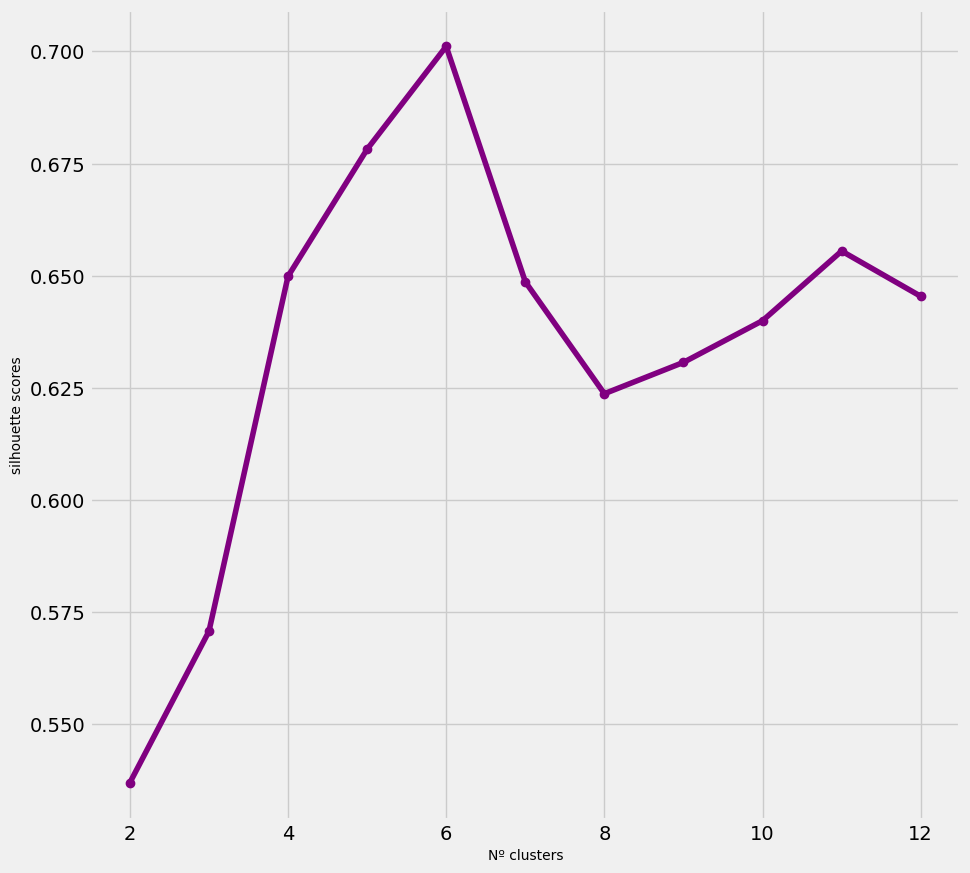

In [48]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(range(2, 13), silhouette_scores, color='purple', marker='o', label='silhouette scores')

ax.set_xlabel('Nº clusters', fontsize=10)
ax.set_ylabel('silhouette scores', fontsize=10)
  
plt.show()

Per Silhouette Score Method, 5 is the best number of clusters. 

In [49]:
principalComponents

array([[-0.66873594,  0.3637677 ],
       [-0.419186  , -0.96839324],
       [-0.70197467,  0.44770256],
       ...,
       [-0.00868207,  0.6844942 ],
       [-0.47442971, -0.70645183],
       [ 0.01048552,  0.64700412]])

## Cluster Analysis: K_means

In [50]:
model = KMeans(n_clusters=6,random_state=42, n_init='auto')
model.fit(principalComponents)

KMeans(n_clusters=6, random_state=42)

In [51]:
labels = model.labels_

In [52]:
mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4:'E',5:'F'}

labels_mapping = [mapping[val] for val in labels]

In [53]:
df['Clusters'] = labels_mapping

In [54]:
df_copy['Clusters'] = labels_mapping

In [55]:
principalDf['Clusters'] = labels_mapping

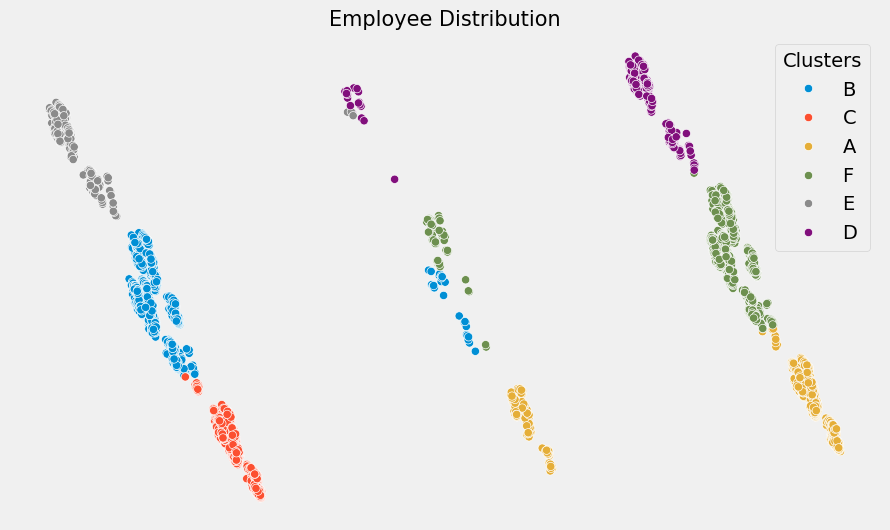

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue='Clusters', ax=ax)

ax.set_title('Employee Distribution', fontsize=15)

ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.spines[:].set_visible(False)

In [57]:
# Count the number of employees in each cluster
cluster_counts = df['Clusters'].value_counts()

# Print total number of employees in each cluster
print("\nTotal Number of Employees in Each Cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} employees")



Total Number of Employees in Each Cluster:
Cluster C: 4141 employees
Cluster B: 3646 employees
Cluster A: 3327 employees
Cluster F: 2724 employees
Cluster E: 906 employees
Cluster D: 678 employees


In [61]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tabulate import tabulate

In [63]:
# Compute number of customers
num_observations = len(df)

# Separate the features and the cluster labels
X = df.drop('Clusters', axis=1)
clusters = df['Clusters']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Number of Observations  |        15422        |
|    Silhouette Score     | 0.16176269766035928 |
| Calinski Harabasz Score | 1639.1245341344252  |
|  Davies Bouldin Score   |  2.643377349592208  |
+-------------------------+---------------------+


Clusters
C    4141
B    3646
A    3327
F    2724
E     906
D     678
Name: count, dtype: int64


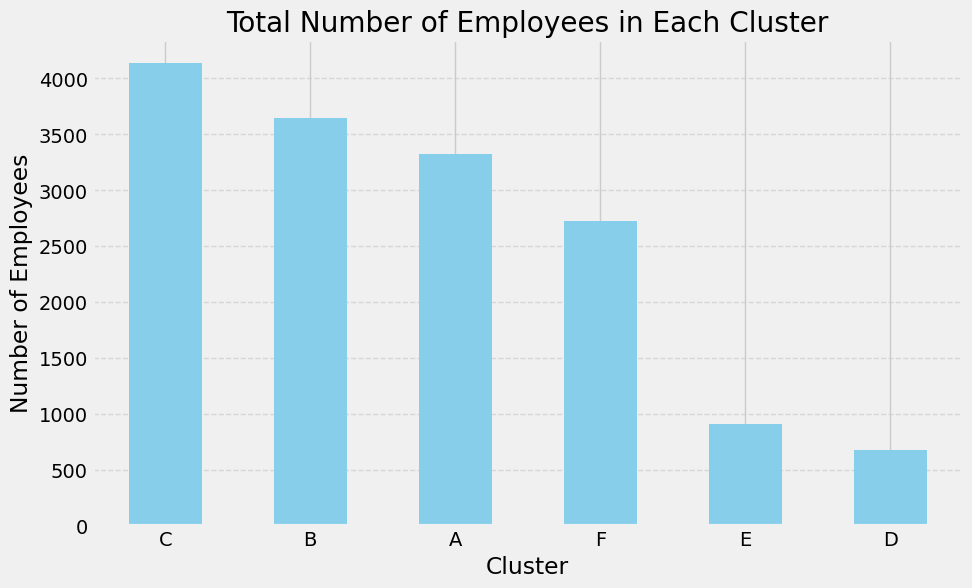

In [58]:
import matplotlib.pyplot as plt

# Count the number of employees in each cluster
cluster_counts = df['Clusters'].value_counts()
print(cluster_counts)
# Create a bar plot
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Total Number of Employees in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [59]:
# Calculate aggregate metrics for each cluster
cluster_metrics = df.groupby('Clusters').agg({
    'KPIs_met_more_than_80': 'mean',
    'awards_won': 'sum',
    'avg_training_score': 'mean'
})

# Assign weights to each metric
weights = {
    'KPIs_met_more_than_80': 0.2,
    'awards_won': 0.3,
    'avg_training_score': 0.5
}

# Calculate composite score for each cluster
cluster_metrics['composite_score'] = (cluster_metrics['KPIs_met_more_than_80'] * weights['KPIs_met_more_than_80'] +
                                      cluster_metrics['awards_won'] * weights['awards_won'] +
                                      cluster_metrics['avg_training_score'] * weights['avg_training_score'])

# Rank clusters based on composite score
ranked_clusters = cluster_metrics['composite_score'].sort_values(ascending=False).index

# Print ranked clusters
print("Ranked Clusters based on Composite Score:")
for rank, cluster in enumerate(ranked_clusters, start=1):
    print(f"Cluster {cluster}: Rank {rank}")




Ranked Clusters based on Composite Score:
Cluster B: Rank 1
Cluster C: Rank 2
Cluster A: Rank 3
Cluster F: Rank 4
Cluster E: Rank 5
Cluster D: Rank 6


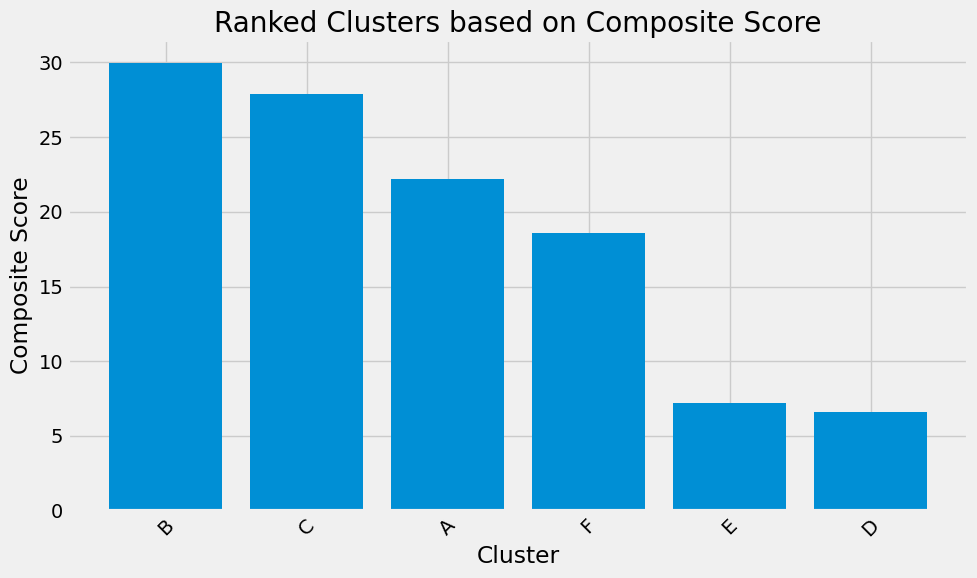

In [60]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(ranked_clusters, cluster_metrics['composite_score'].sort_values(ascending=False))

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Composite Score')
plt.title('Ranked Clusters based on Composite Score')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

